In [1]:
# Install Libraries - Toolbox for Analysis
import numpy as np
import numpy.matlib as matlib
import pandas as pd
from scipy.io import loadmat
from scipy import stats
import math
import mat73
import warnings

# Install Libraries - Toolbox for Visualization
from heatmap import heatmap, corrplot
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as GridSpec
from matplotlib.lines import Line2D
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import TwoSlopeNorm, LinearSegmentedColormap
%matplotlib inline

print('seaborn version:', sns.__version__)
if sns.__version__ != "0.11.1":
    warnings.warn('This script was written with the seaborn package (v0.11.1)', category=Warning)

seaborn version: 0.11.1


In [3]:
# Define File Path
input_datapath = '../data/simulation_data/HM_beta.mat'
# Load Data
HEATMAP = mat73.loadmat(input_datapath)['HEATMAP'] # requires .mat file to be of v7.3
HEATMAP_precision = HEATMAP['precision']
HEATMAP_recall = HEATMAP['recall']
HEATMAP_f1score = HEATMAP['f1_score']

In [4]:
# Set Parameters
Fs = 512; foi = 25
nMethod = 5
listNoise = np.arange(-10,12,2)
listCycle = np.arange(3,13)
print('Burst Duration (cycles): ', listCycle)
print('SNR (dB): ', listNoise)
print('Number of Algorithms: {}'.format(nMethod))

Burst Duration (cycles):  [ 3  4  5  6  7  8  9 10 11 12]
SNR (dB):  [-10  -8  -6  -4  -2   0   2   4   6   8  10]
Number of Algorithms: 5


In [5]:
# Organize Data into Matrices
def extract_matrix(DATA):
    mat_bp = DATA['bp']; mat_ev = DATA['ev'];
    mat_stp = DATA['stp']; mat_mtp = DATA['mtp']; mat_cwt = DATA['cwt']
    return mat_bp, mat_ev, mat_stp, mat_mtp, mat_cwt

matP_bp, matP_ev, matP_stp, matP_mtp, matP_cwt = extract_matrix(HEATMAP_precision)
matR_bp, matR_ev, matR_stp, matR_mtp, matR_cwt = extract_matrix(HEATMAP_recall)
matF_bp, matF_ev, matF_stp, matF_mtp, matF_cwt = extract_matrix(HEATMAP_f1score)

matP = [matP_bp, matP_ev, matP_stp, matP_mtp, matP_cwt]
matR = [matR_bp, matR_ev, matR_stp, matR_mtp, matR_cwt]
matF = [matF_bp, matF_ev, matF_stp, matF_mtp, matF_cwt]

In [6]:
# Set Visualization Parameters
sns.set(font='Helvetica',font_scale=2)
sns.set_style("ticks", {"xtick.major.size": 5, "ytick.major.size": 5})
sns.set_context(rc={"fontsize":15,"axes.titlesize":18,"axes.labelsize":18,"axes.linewidth":1.5})
plt.rcParams['legend.fontsize'] = 12
plt.rcParams['axes.linewidth'] = 5

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  # This is added back by InteractiveShellApp.init_path()


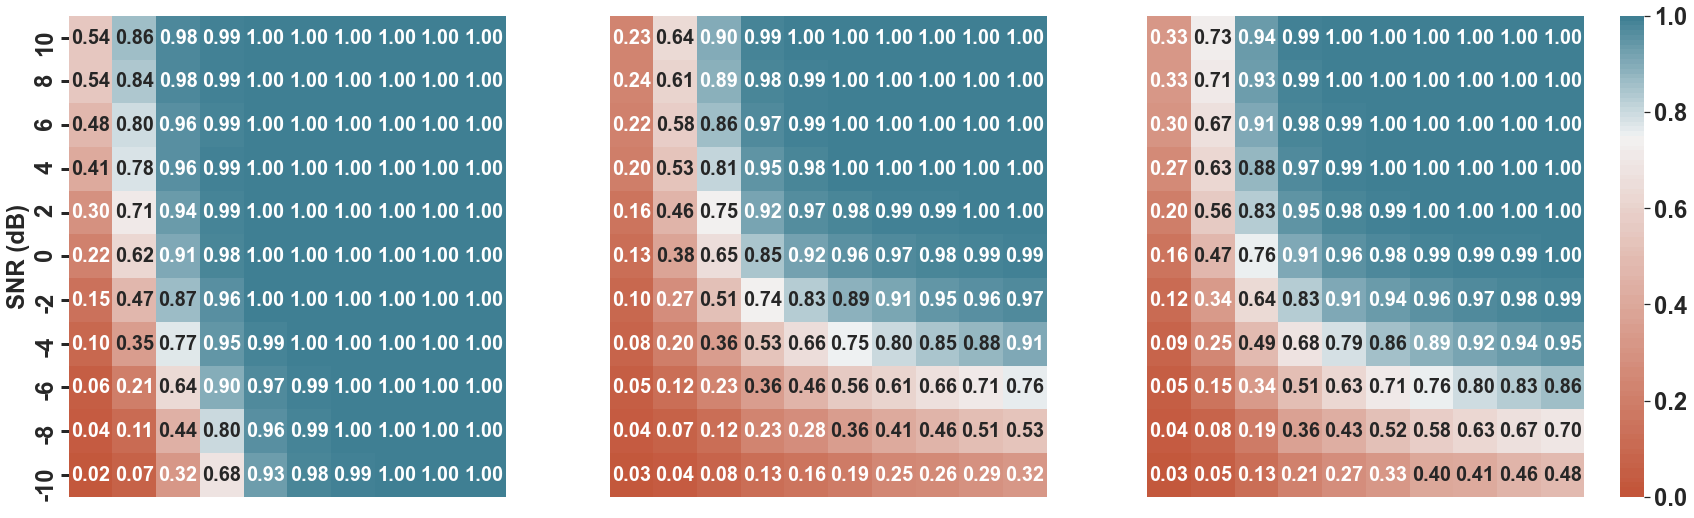

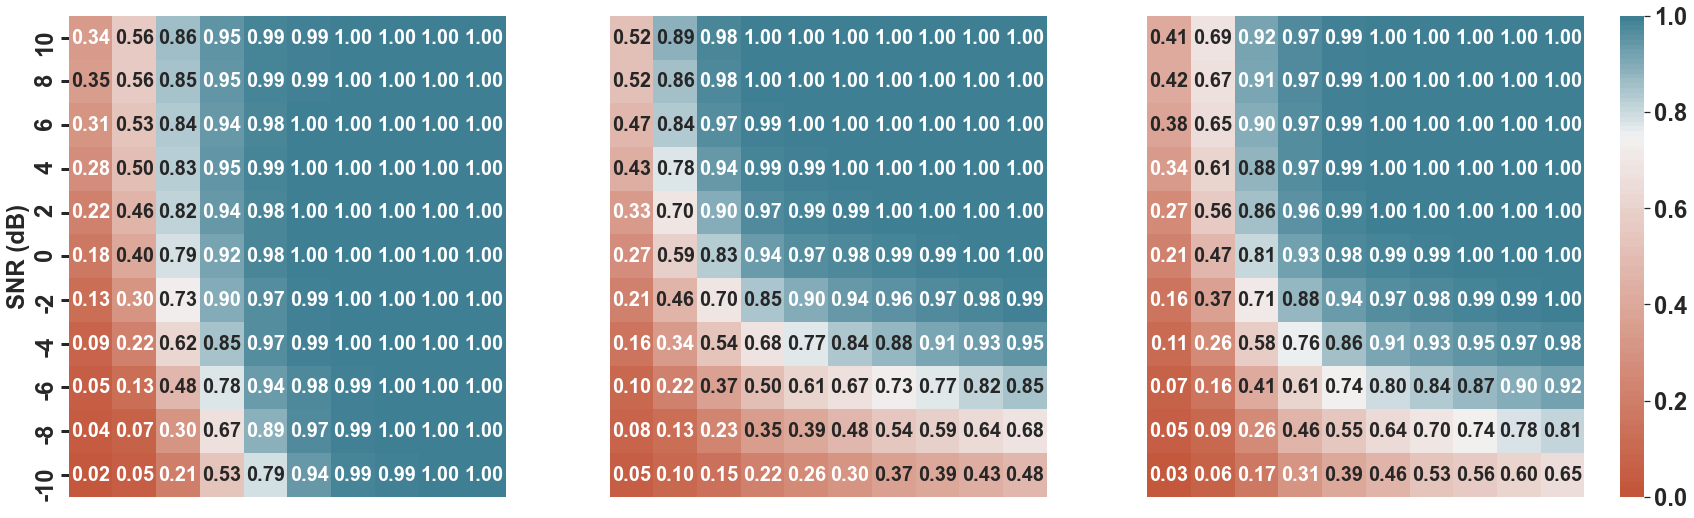

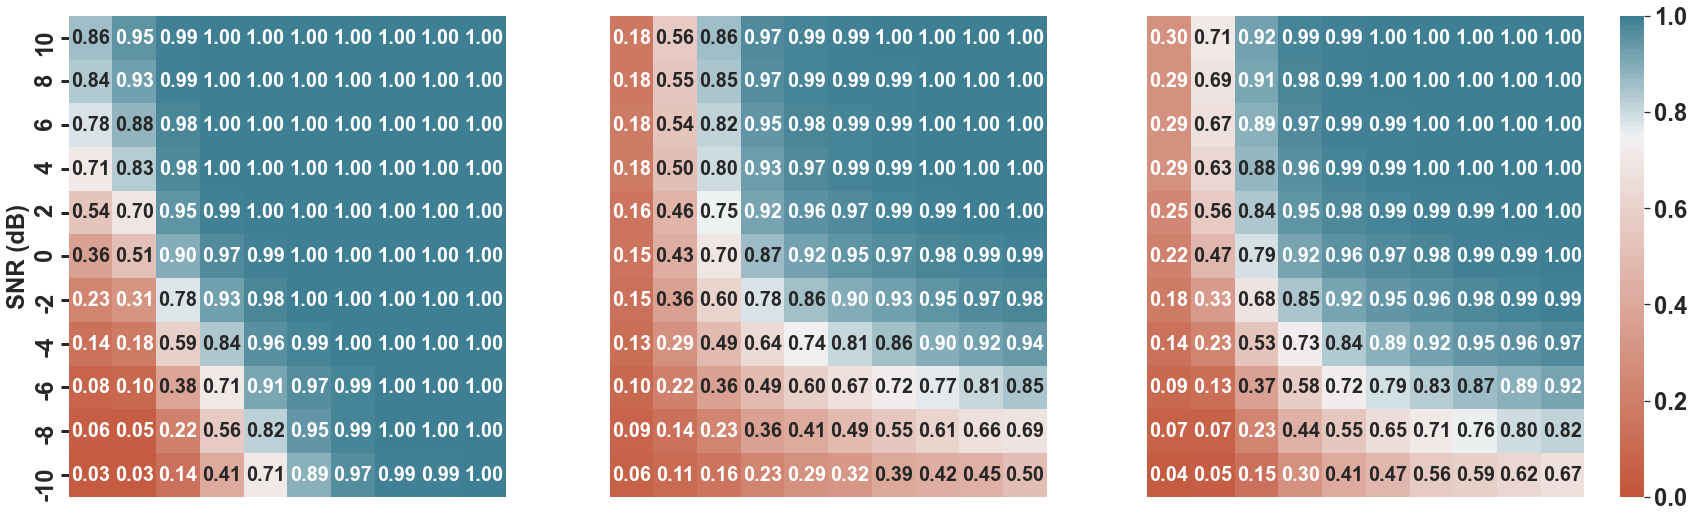

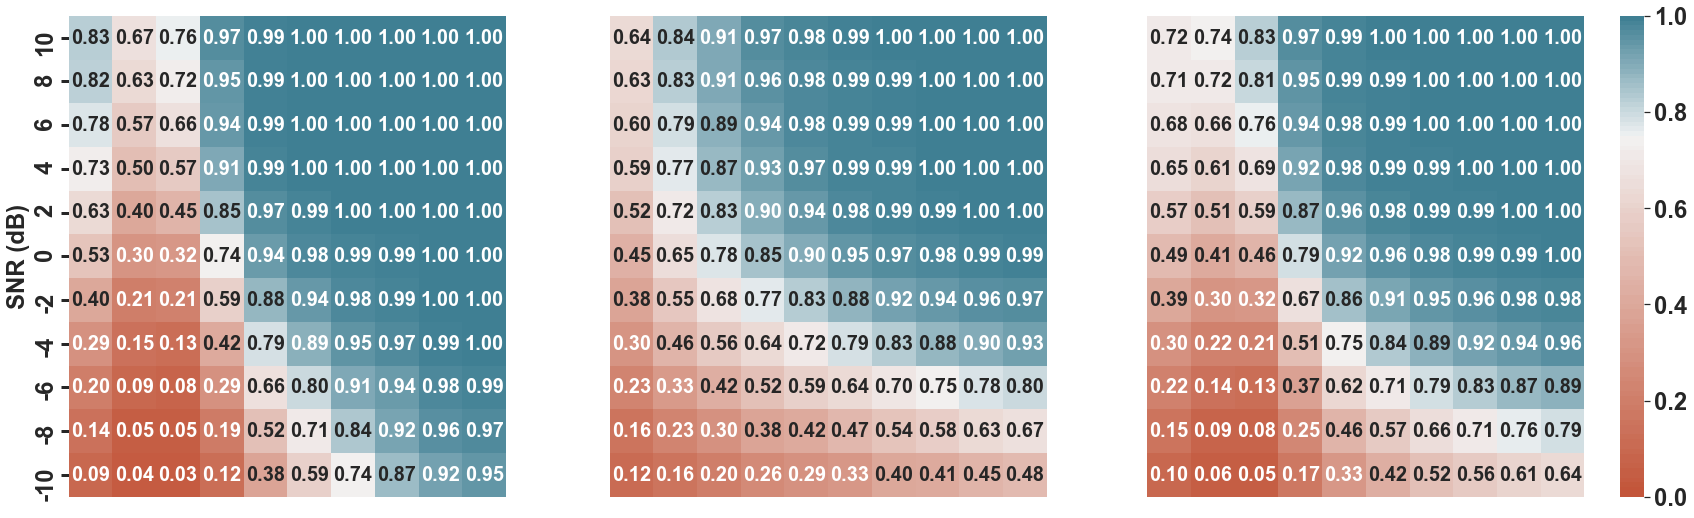

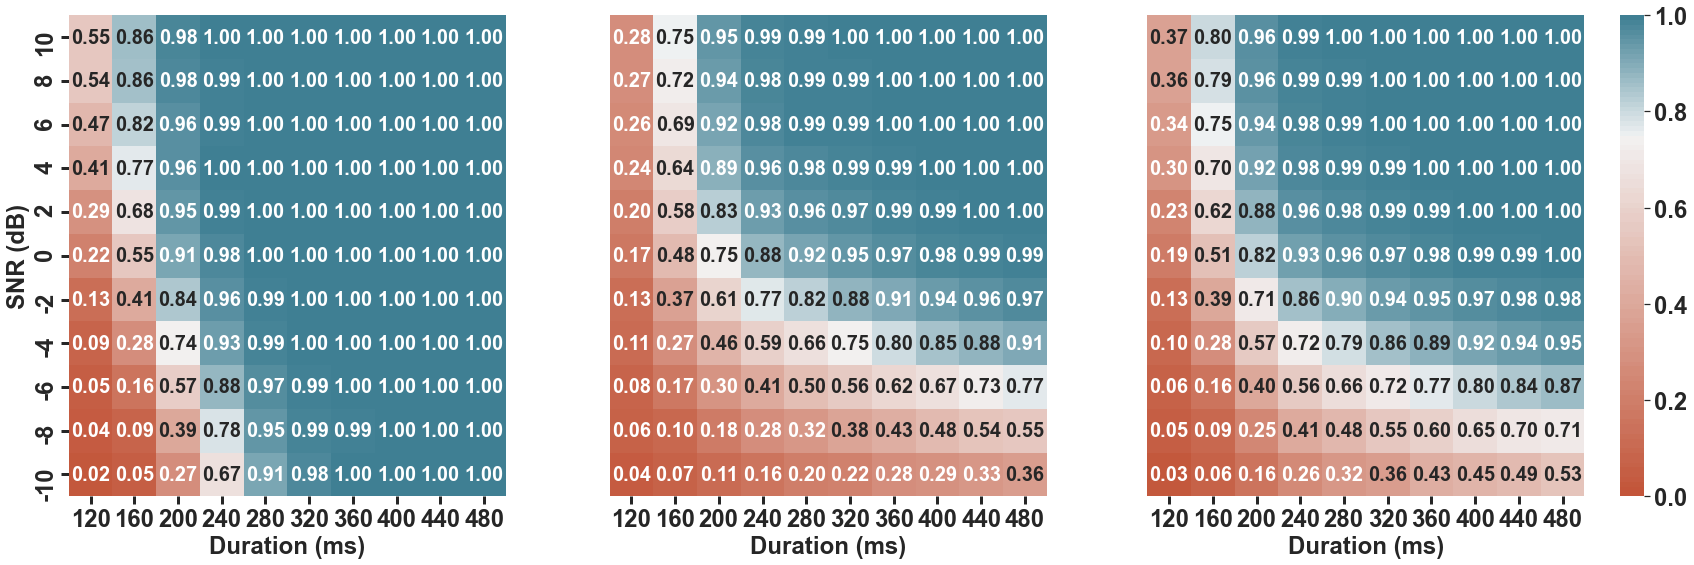

In [7]:
# Plot Precision, Recall, F1-Score Heatmaps
def plot_heatmap(matrix,nInd,custom_cmap,xtk_opt,cbar_opt):
    fnt_sz = 24
    clr_map = custom_cmap
    divnorm = TwoSlopeNorm(vmin=0, vcenter=0.75, vmax=1)
    hmp = sns.heatmap(matrix, cmap=clr_map, norm=divnorm, cbar = cbar_opt,
                    annot=True, fmt='.2f', annot_kws={"fontsize":20,"weight":"bold"},
                    square=True, ax=ax[nInd])
    cbar_ticks = hmp.figure.axes[-1].get_yticklabels()
    hmp.figure.axes[-1].set_yticklabels(cbar_ticks[:],fontweight='bold',fontsize=fnt_sz)
    ax[nInd].invert_yaxis()
    x_labels = ((listCycle*(512/25))/512*1000).astype(int)
    y_labels = listNoise
    ax[nInd].tick_params('both', length=8, width = 3, which='major')
    if nInd == 0:
        ax[nInd].set_ylabel('SNR (dB)',fontsize=fnt_sz,fontweight='bold')
        ax[nInd].set_yticklabels(y_labels,fontsize=fnt_sz,fontweight='bold')
    if nInd > 0:
        ax[nInd].tick_params(left=False)
        ylabel_txt = [item.get_text() for item in ax[nInd].get_yticklabels()]
        empty_str_lbl = ['']*len(ylabel_txt)
        ax[nInd].set_yticklabels(empty_str_lbl)
    if xtk_opt:
        ax[nInd].tick_params(bottom=False)
        xlabel_txt = [item.get_text() for item in ax[nInd].get_xticklabels()]
        empty_str_lbl = ['']*len(xlabel_txt)
        ax[nInd].set_xticklabels(empty_str_lbl)
    else:
        ax[nInd].set_xlabel('Duration (ms)',fontsize=fnt_sz,fontweight='bold')
        ax[nInd].set_xticklabels(x_labels,fontsize=fnt_sz,fontweight='bold')
    return hmp
    
def plot_method(matP,matR,matF,custom_cmap,xtk_opt):
    hmp1 = plot_heatmap(matP,0,custom_cmap,xtk_opt,cbar_opt=False)
    hmp2 = plot_heatmap(matR,1,custom_cmap,xtk_opt,cbar_opt=False)
    hmp3 = plot_heatmap(matF,2,custom_cmap,xtk_opt,cbar_opt=True)
    return hmp3
    
cmap = sns.diverging_palette(20, 220, n=100)
xtk_opt = True
for i in range(nMethod-1):
    fig_title = "figure3_{}.svg".format(i+1)
    fig,ax = plt.subplots(nrows=1,ncols=3,figsize=(23,5))
    hmp3 = plot_method(matP[i],matR[i],matF[i],cmap,xtk_opt)
    fig.tight_layout(pad=-3)
    pos1 = ax[0].get_position()
    pos2 = ax[1].get_position()
    pos3 = ax[2].get_position()
    pos4 = hmp3.figure.axes[-1].get_position()
    #fig.savefig(fig_title,bbox_inches='tight',dpi=1200)
    plt.show()

xtk_opt = False
i = 4
fig_title = "figure3_{}.svg".format(i+1)
fig,ax = plt.subplots(nrows=1,ncols=3,figsize=(23,5))
hmp3 = plot_method(matP[i],matR[i],matF[i],cmap,xtk_opt)
ax[0].set_position(pos1)
ax[1].set_position(pos2)
ax[2].set_position(pos3)
hmp3.figure.axes[-1].set_position(pos4)
#fig.savefig(fig_title,bbox_inches='tight',dpi=1200)
plt.show()

# For FixedFormatter warning, refer to: https://github.com/pandas-dev/pandas/issues/35684